In [125]:
import numpy as np
import pandas as pd
%pip install word2number
from word2number import w2n
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Note: you may need to restart the kernel to use updated packages.


In [126]:

columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"]

data = pd.read_csv("../data/imports-85.data", names=columns, na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data found! removing rows with missing data!

In [127]:
dataDropped = data.dropna().reset_index(drop=True)
dataDropped.info()

print(dataDropped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

For whatever reason, some numbers were written as words! converting to int...

In [128]:
strangeColumns = ["num-of-doors", "num-of-cylinders"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = dataDropped[strangeColumns]
standardData = dataDropped[standardColumns]

strangeData = strangeData.map(lambda a : w2n.word_to_num(str(a)))

data = pd.concat([standardData, strangeData], axis=1)
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel-type          159 non-null    object 
 1   engine-size        159 non-null    int64  
 2   city-mpg           159 non-null    int64  
 3   stroke             159 non-null    float64
 4   normalized-losses  159 non-null    float64
 5   engine-location    159 non-null    object 
 6   price              159 non-null    float64
 7   symboling          159 non-null    int64  
 8   peak-rpm           159 non-null    float64
 9   fuel-system        159 non-null    object 
 10  drive-wheels       159 non-null    object 
 11  bore               159 non-null    float64
 12  engine-type        159 non-null    object 
 13  curb-weight        159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  make               159 non-null    object 
 16  wheel-base         159 non

Strings found! Using one-hot encoding to change data to numeric

In [129]:
strangeColumns = ["engine-location", "body-style", "drive-wheels", "engine-type", "fuel-type", "make", "fuel-system", "aspiration"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = pd.DataFrame()
standardData = data[standardColumns]

for column in strangeColumns:
    local_cat = data[[column]]  
    local_cat.sample(10)

    encoder = OneHotEncoder()
    local_cat = encoder.fit_transform(local_cat).toarray()
    local_data = pd.DataFrame(local_cat, columns=encoder.get_feature_names_out([column]))
    strangeData = pd.concat([strangeData, local_data], axis=1)
    print(local_data)
dataCleaned = pd.concat([strangeData, standardData], axis=1)
print("#" * 100)
print(data)
#data.info()

     engine-location_front
0                      1.0
1                      1.0
2                      1.0
3                      1.0
4                      1.0
..                     ...
154                    1.0
155                    1.0
156                    1.0
157                    1.0
158                    1.0

[159 rows x 1 columns]
     body-style_convertible  body-style_hardtop  body-style_hatchback  \
0                       0.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
..                      ...                 ...                   ...   
154                     0.0                 0.0                   0.0   
155                     0.0                 0.0                   0.

Unscaled values found! Using Standard scaler to scale

In [130]:
scaler = StandardScaler()

newColumns = list(dataCleaned.columns.values)

target = ["price", "peak-rpm", "horsepower"]
X = dataCleaned[list(set(newColumns) - set(target))]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train_set_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(train_set_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,fuel-system_mpfi,fuel-type_gas,engine-type_dohc,engine-size,city-mpg,stroke,num-of-cylinders,make_dodge,symboling,aspiration_std,...,make_honda,make_mercedes-benz,make_saab,engine-type_ohcv,body-style_sedan,drive-wheels_rwd,make_audi,height,width,curb-weight
0,-0.928841,0.342997,-0.235702,-0.724420,-0.355200,0.552261,-0.44780,-0.235702,0.288697,-2.068279,...,-0.303239,-0.146647,-0.235702,-0.282038,-1.054093,-0.630126,-0.180579,-1.472804,-0.998785,-0.712296
1,-0.928841,0.342997,-0.235702,0.033926,-0.355200,0.786330,-0.44780,4.242641,-1.373499,0.483494,...,-0.303239,-0.146647,-0.235702,-0.282038,-1.054093,-0.630126,-0.180579,2.628979,-0.574246,0.104421
2,1.076611,0.342997,-0.235702,0.318306,-1.424014,0.585699,1.01913,-0.235702,0.288697,-2.068279,...,-0.303239,-0.146647,-0.235702,-0.282038,0.948683,-0.630126,5.537749,0.851540,3.034340,1.258295
3,-0.928841,0.342997,-0.235702,-0.408443,-0.507888,-1.955616,-0.44780,-0.235702,-0.542401,0.483494,...,-0.303239,-0.146647,-0.235702,-0.282038,-1.054093,-0.630126,-0.180579,0.395786,-0.149706,-0.136406
4,-0.928841,0.342997,-0.235702,-0.345247,-0.507888,0.786330,-0.44780,-0.235702,-1.373499,0.483494,...,-0.303239,-0.146647,-0.235702,-0.282038,0.948683,-0.630126,-0.180579,-1.108201,-0.149706,-0.172007


from sklearn.linear_model import *

model = Ridge(0.018)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.coef_)

print(model.predict(X_test) - y_test)

In [131]:
alphaList = [10 / 1.1 ** i for i in range(100)]
modelList = [
    ["Ridge---------------", lambda a : Ridge(alpha=a, max_iter=50000, random_state=42)],
    ["Lasso---------------", lambda a : Lasso(alpha=a, max_iter=50000, random_state=42)],
    ["Elastic Net .8 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.8, random_state=42)],
    ["Elastic Net .6 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.6, random_state=42)],
    ["Elastic Net .4 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.4, random_state=42)],
    ["Elastic Net .2 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.2, random_state=42)]
]
print(alphaList)

[10.0, 9.09090909090909, 8.264462809917354, 7.513148009015775, 6.830134553650705, 6.2092132305915495, 5.644739300537772, 5.131581182307064, 4.66507380209733, 4.240976183724846, 3.855432894295314, 3.504938994813922, 3.186308177103565, 2.896643797366877, 2.6333125430607973, 2.3939204936916334, 2.176291357901485, 1.9784466890013497, 1.798587899092136, 1.635079908265578, 1.4864362802414344, 1.3513057093103948, 1.2284597357367224, 1.1167815779424748, 1.0152559799477043, 0.9229599817706402, 0.8390545288824002, 0.7627768444385455, 0.6934334949441322, 0.6303940863128475, 0.5730855330116795, 0.5209868481924358, 0.4736244074476689, 0.43056764313424445, 0.39142513012204033, 0.355841027383673, 0.3234918430760664, 0.29408349370551484, 0.2673486306413771, 0.24304420967397916, 0.2209492815217992, 0.20086298320163565, 0.18260271200148695, 0.1660024654558972, 0.15091133223263378, 0.13719212021148527, 0.12472010928316841, 0.1133819175301531, 0.10307447048195735, 0.09370406407450667, 0.08518551279500607,

Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 10.0
   train:    825098.5140652346	   val:      1227914.2048666314
   error:    402815.69080139685	   accuracy: 0.6562455456121605
  alpha 9.09090909090909
   train:    798969.3572414912	   val:      1211512.892459016
   error:    412543.53521752486	   accuracy: 0.6628691468978153
  alpha 8.264462809917354
   train:    773372.5505697532	   val:      1196090.9397257697
   error:    422718.3891560165	   accuracy: 0.6691690333138789
  alpha 7.513148009015775
   train:    748388.5779745075	   val:      1181688.0764795071
   error:    433299.4985049997	   accuracy: 0.6751405175550943
  alpha 6.830134553650705
   train:    724089.5623794395	   val:      1168329.0021232963
   error:    444239.4397438568	   accuracy: 0.6807826118769121
  alpha 6.2092132305915495
   train:    700538.1223855373	   val:      1156023.0232740785
   error:    455484.90088854125	   accurac

C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.006497753664165407
   train:    256964.15082457536	   val:      1034519.5614763945
   error:    777555.4106518192	   accuracy: 0.6764243118838458


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.005907048785604915
   train:    256964.0792605189	   val:      1034568.8374900456
   error:    777604.7582295267	   accuracy: 0.6752060270379091


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0053700443505499225
   train:    256964.02189106934	   val:      1034613.6217653024
   error:    777649.599874233	   accuracy: 0.6741778434698782


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.004881858500499929
   train:    256963.97228213632	   val:      1034654.425468305
   error:    777690.4531861687	   accuracy: 0.6730560443590307


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.004438053182272662
   train:    256963.92946819463	   val:      1034691.6039759131
   error:    777727.6745077185	   accuracy: 0.6718583735374181


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.004034593802066057
   train:    256963.89408527166	   val:      1034725.4214096615
   error:    777761.5273243899	   accuracy: 0.6707502096578094


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0036678125473327784
   train:    256963.86476949623	   val:      1034756.1737448736
   error:    777792.3089753774	   accuracy: 0.6697428373120976


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.952e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0033343750430297986
   train:    256963.83898489756	   val:      1034778.7519975482
   error:    777814.9130126506	   accuracy: 0.6688186722236101


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.952e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.003031250039117998
   train:    256963.8191156547	   val:      1034804.6782070649
   error:    777840.8590914102	   accuracy: 0.667966047601888


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.951e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0027556818537436347
   train:    256963.80269358633	   val:      1034828.2565297523
   error:    777864.453836166	   accuracy: 0.667181112848016


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.951e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002505165321585122
   train:    256963.78912096284	   val:      1034849.6989088877
   error:    777885.9097879248	   accuracy: 0.6664594418157256


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.794e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002277423019622838
   train:    256963.7768552551	   val:      1034876.4904982921
   error:    777912.713643037	   accuracy: 0.6657336072404875


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.792e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002070384563293489
   train:    256963.76689441394	   val:      1034879.5802755681
   error:    777915.8133811541	   accuracy: 0.665132627455676


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.430e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.790e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0018821677848122626
   train:    256963.76027774825	   val:      1034892.6013172733
   error:    777928.8410395251	   accuracy: 0.6645809038122349


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.788e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0017110616225566022
   train:    256963.75391053292	   val:      1034908.224347354
   error:    777944.4704368211	   accuracy: 0.664051052872372


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.787e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0015555105659605473
   train:    256963.7487335046	   val:      1034922.4075187575
   error:    777958.658785253	   accuracy: 0.6636218392734503


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.429e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.785e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0014141005145095883
   train:    256963.74440183825	   val:      1034935.3091115343
   error:    777971.564709696	   accuracy: 0.6632148582729599


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.506e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.788e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0012855459222814438
   train:    256963.74090199205	   val:      1034920.1611839632
   error:    777956.4202819711	   accuracy: 0.6628448212199872


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.519e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.787e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0011686781111649488
   train:    256963.73729185582	   val:      1034955.5094135663
   error:    777991.7721217105	   accuracy: 0.6625262260264738


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.519e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.786e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0010624346465135897
   train:    256963.73497291064	   val:      1034965.398989724
   error:    778001.6640168134	   accuracy: 0.6622275773798196


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.785e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0009658496786487179
   train:    256963.73313353464	   val:      1032960.9017171309
   error:    775997.1685835962	   accuracy: 0.6621408830686711


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.550e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.784e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0008780451624079253
   train:    256963.7324641958	   val:      1029632.0374917538
   error:    772668.305027558	   accuracy: 0.6622071904580995


C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.547e+07, tolerance: 3.071e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Windows 11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.755e+05, tolerance: 1.819e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0007982228749162957
   train:    256963.73129732127	   val:      1026460.8713197409
   error:    769497.1400224196	   accuracy: 0.6622047661609676

Best alpha: 0.3234918430760664
Generalization error: 754119.1739104831
Coefficient: [[-2.59558196e+02 -9.43564779e+01  2.58745240e+03 -2.27025969e+01
  -4.54347406e+01 -2.22528071e+03 -6.45635535e+02 -1.95724325e+03
   2.46657823e+02 -9.65527278e+02  3.10810577e+02 -0.00000000e+00
  -5.39307754e+02  2.23675132e+01 -1.30353793e+03 -0.00000000e+00
  -2.62268551e+02 -4.92557181e+03 -6.38784281e+02  2.99352342e+02
  -1.95503615e+03  0.00000000e+00  3.55891440e+03  2.18779472e+02
  -7.49598730e+02  7.01026065e+03 -0.00000000e+00 -1.08914876e+02
  -1.95430922e+03 -8.05976182e+02  8.72831425e+03  0.00000000e+00
   4.01465904e+00  4.07756231e+02  1.37276910e+02 -6.66980439e+02
  -2.95659536e+03  0.00000000e+00  8.45911398e+03  5.48546807e+02
  -1.06062312e+03  2.57340228e+02 -1.36621281e+02  1.55849275e+02
   8.45569570e+01 -1.96551328e+0

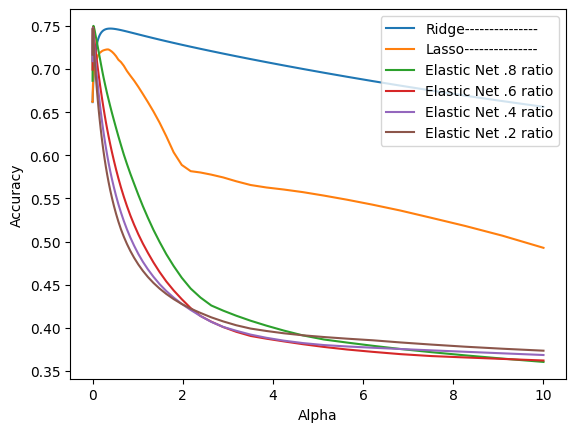

In [132]:
def train():
    bestest_model = [0, None, "None"]
    for modelStruct in modelList:
        xPoint = []
        yPoint = []
        name, modelCall = modelStruct
        print(f"{name}{'-' * 100}")
        lowestVal = [1000, 0, None, 0, 0, 0]
        for alpha in alphaList:
            model = modelCall(alpha)
            model.fit(X_train, y_train)
    
            #get MSEs
            train_pred = model.predict(X_train)
            train_mse  = mean_squared_error(y_train, train_pred)
            val_pred   = model.predict(X_val)
            val_mse    = mean_squared_error(y_val, val_pred)
            error      = abs(train_mse - val_mse)
            acc        = model.score(X_val, y_val)
            #I PONDERED IF ACCURACY IS PAC OR MODE.SCORE(), IN THE END I USED MODEL.SCORE()
    
            print(f"  alpha {alpha}\n   train:    {train_mse}\t   val:      {val_mse}\n   error:    {error}\t   accuracy: {acc}")
            if (lowestVal[5] < acc):
                lowestVal = [error, alpha, model, train_mse, val_mse, acc]
                if (bestest_model[0] < acc):
                    bestest_model = [acc, model, name]
            xPoint.append(alpha)
            yPoint.append(acc)
        plt.plot(xPoint, yPoint, label=name)
        best_model = lowestVal[2]
        #print requirements
        print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    print(f"Best model: {bestest_model[2]}")
    best_model = bestest_model[1]
    print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    return best_model
best_model = train()

    predictedPrice    price
0      5636.622266   6189.0
1      6824.200502   5118.0
2     10728.310760  11245.0
3      7652.733873   6938.0
4      8933.123219   7957.0
5      6170.377395   6649.0
6      8836.585118   9298.0
7      5098.706008   6377.0
8      9518.307028   9549.0
9      5516.958390   5572.0
10     7885.842978   8499.0
11    15449.319580  16900.0
12    15850.420103  12940.0
13    11639.526654   9639.0
14     6815.040674   7053.0
15     9816.707385  11248.0
16     8868.214633   7895.0
17    27092.566916  28248.0
18    29204.372688  31600.0
19    16672.841277  16925.0
20     7902.631829   7126.0
21    13846.331672  12964.0
22    17947.361926  15998.0
23     8778.460681   8189.0
24    11277.849566   8495.0
25    29188.401045  35056.0
26    21780.395304  22470.0
27     8339.692673   7738.0
28    12371.167094  13950.0
29    16651.015410  16430.0
30    16581.835229  22018.0
31    -2005.876826   5151.0
    predictedPeak-rpm  peak-rpm
0         5330.103917    5500.0
1         47

<Axes: xlabel='horsepower', ylabel='predictedHorsepower'>

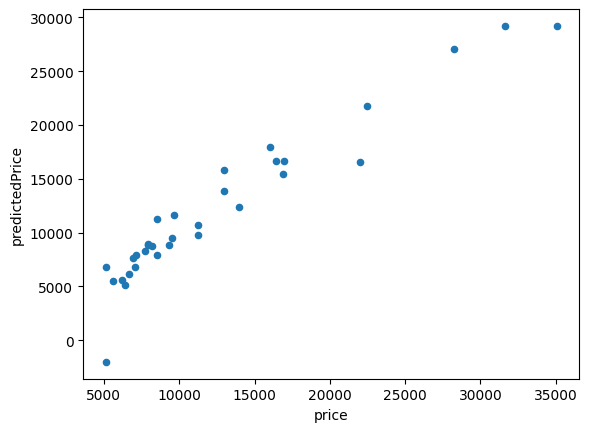

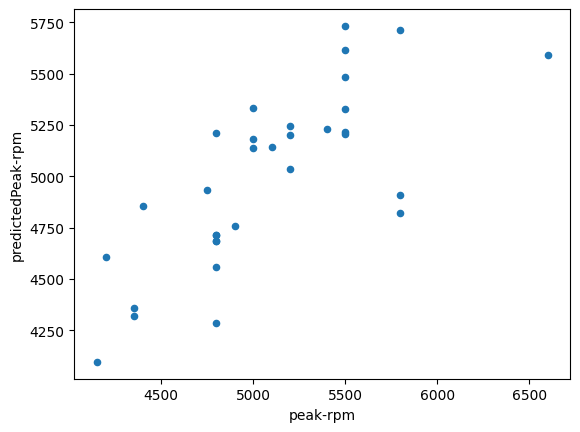

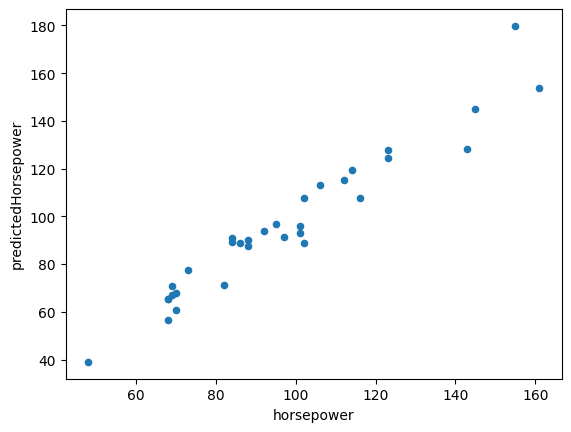

In [133]:
y_pred = best_model.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=["predictedPrice", "predictedPeak-rpm", "predictedHorsepower"])

print(pd.concat([y_pred[["predictedPrice"]], y_test[["price"]].reset_index(drop=True)], axis=1))
print(pd.concat([y_pred[["predictedPeak-rpm"]], y_test[["peak-rpm"]].reset_index(drop=True)], axis=1))
print(pd.concat([y_pred[["predictedHorsepower"]], y_test[["horsepower"]].reset_index(drop=True)], axis=1))

pd.concat([y_pred[["predictedPrice"]], y_test[["price"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="price", y="predictedPrice")
pd.concat([y_pred[["predictedPeak-rpm"]], y_test[["peak-rpm"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="peak-rpm", y="predictedPeak-rpm")
pd.concat([y_pred[["predictedHorsepower"]], y_test[["horsepower"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="horsepower", y="predictedHorsepower")

#xPoint, yPoint = [], []
#for i in range(len(y_pred)):
#    xPoint.append(y_pred[i][0])
#    yPoint.append(np.array(y_test, dtype="int")[i][0])
#plt.plot(xPoint, yPoint)

In [134]:
numList = [[newColumns[i], abs(best_model.coef_[2][i])] for i in range(len(best_model.coef_[2]))]
sortList = sorted(numList, key=lambda num: num[1], reverse=True) 
top10 = [sortList[i][0] for i in range(10)]
print(top10)

['body-style_hardtop', 'make_nissan', 'aspiration_std', 'bore', 'stroke', 'make_bmw', 'engine-type_dohc', 'fuel-system_1bbl', 'make_peugot', 'make_audi']


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 10.0
   train:    9136885.598319696	   val:      4608560.064086477
   error:    4528325.534233219	   accuracy: 0.259381517157106
  alpha 9.09090909090909
   train:    8993420.045944804	   val:      4518420.505954532
   error:    4474999.539990272	   accuracy: 0.2694977272434879
  alpha 8.264462809917354
   train:    8854415.405001448	   val:      4433192.499461111
   error:    4421222.905540338	   accuracy: 0.2793164176090844
  alpha 7.513148009015775
   train:    8720278.971444588	   val:      4353026.178709812
   error:    4367252.792734776	   accuracy: 0.2888084740993673
  alpha 6.830134553650705
   train:    8591353.892025357	   val:      4278000.598874165
   error:    4313353.293151192	   accuracy: 0.2979490577920871
  alpha 6.2092132305915495
   train:    8467920.026222588	   val:      4208128.810709174
   error:    4259791.215513415	   accuracy: 0.3067

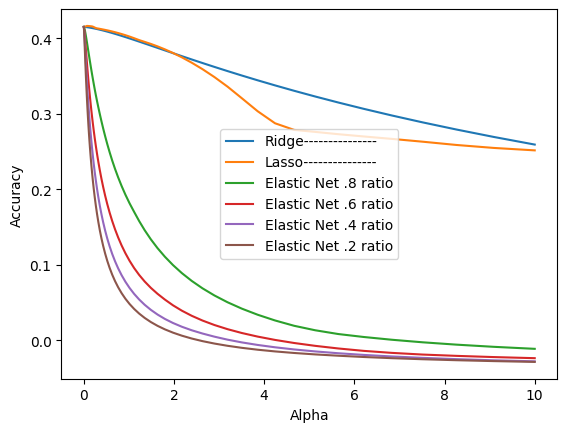

Lasso(alpha=0.07040125024380665, max_iter=50000, random_state=42)

In [135]:
X = dataCleaned[top10]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train()